In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

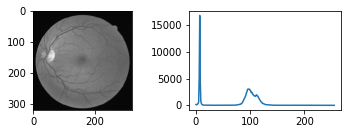

In [ ]:
imagem = cv2.imread('i.jpg', 0)
histograma = cv2.calcHist([imagem], [0], None, [256], [0,256])

figura = plt.figure()
figura.add_subplot(2,2,1)
plt.imshow(imagem, cmap='gray')
figura.add_subplot(2,2,2)
plt.plot(histograma)

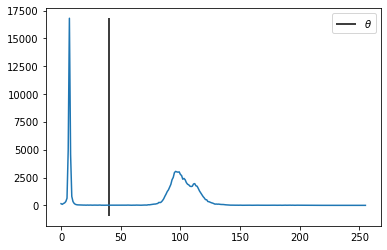

In [ ]:
theta = 40

plt.plot(histograma)
plt.vlines(theta, -950, histograma.max(), label=r'$ \theta $')
plt.legend()

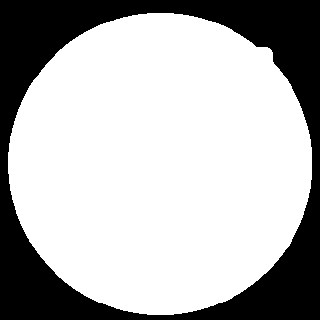

40.0


In [ ]:
valor, imagemBinarizada1 = cv2.threshold(imagem, theta, 255, cv2.THRESH_BINARY)
cv2_imshow(imagemBinarizada1)
print(valor)

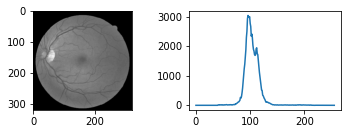

In [ ]:
ROI = cv2.bitwise_and(imagem, imagem, mask=imagemBinarizada1)
histograma2 = cv2.calcHist([imagem], [0], imagemBinarizada1, [256], [0,256])

figura = plt.figure()
figura.add_subplot(2,2,1)
plt.imshow(ROI, cmap='gray')
figura.add_subplot(2,2,2)
plt.plot(histograma2)

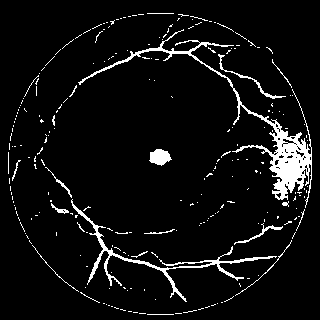

In [ ]:
_, imagemBinarizada2 = cv2.threshold(ROI, 89, 255, cv2.THRESH_BINARY_INV)
resultado1 = cv2.bitwise_and(imagemBinarizada1, imagemBinarizada2)
cv2_imshow(resultado1)

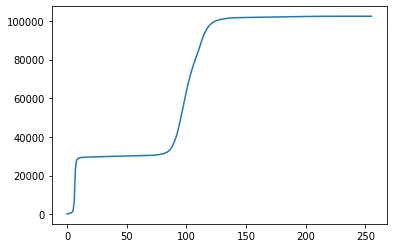

In [ ]:
cdf = histograma.cumsum()
plt.plot(cdf)

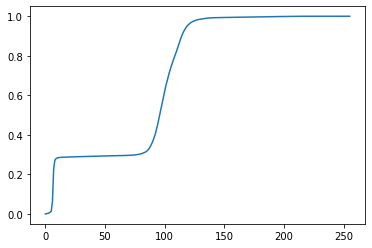

In [ ]:
cdf_normalizada = (cdf - cdf.min())/ (cdf.max() - cdf.min())
plt.plot(cdf_normalizada)

In [ ]:
cdf_mask = np.ma.masked_equal(cdf_normalizada,0)

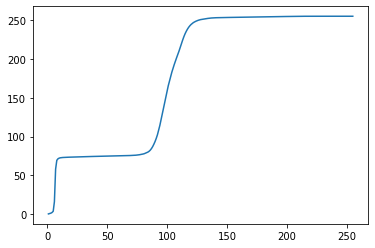

In [ ]:
cdf_mask *= 255
plt.plot(cdf_mask)

In [ ]:
cdf_alterada = np.ma.filled(cdf_mask,0).astype('uint8')
print(cdf_alterada)

[  0   0   0   1   2   3  15  57  69  71  72  72  72  72  73  73  73  73
  73  73  73  73  73  73  73  73  73  73  73  73  73  73  74  74  74  74
  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74  74
  74  74  74  74  75  75  75  75  75  75  75  75  75  75  75  75  75  75
  75  75  75  76  76  76  76  77  77  77  78  79  79  80  82  84  86  90
  93  97 102 108 114 121 129 136 144 151 158 165 171 177 182 188 192 197
 201 205 210 214 219 224 228 232 235 238 240 242 244 245 246 247 248 249
 249 250 250 250 251 251 251 251 252 252 252 252 252 252 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

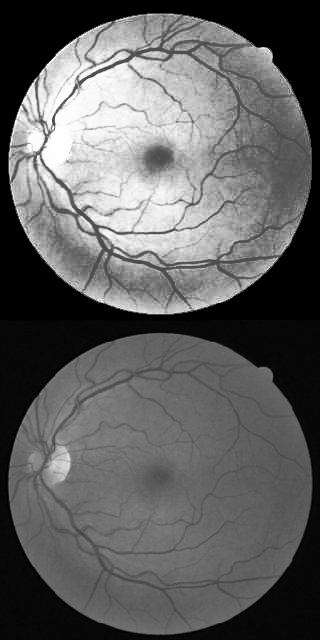

In [ ]:
resultado2 = cdf_alterada[imagem]
resultado2= cv2.bitwise_and(resultado2, resultado2, mask=imagemBinarizada1)
cv2_imshow(np.vstack([resultado2, imagem]))

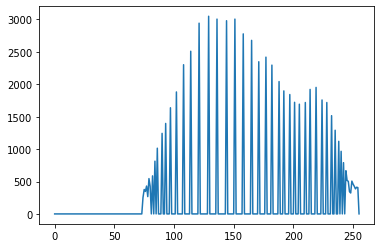

In [ ]:
histograma2 = cv2.calcHist([resultado2], [0], imagemBinarizada1, [256], [0,256])
plt.plot(histograma2)